In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

pd.set_option("display.max_columns", None)


#É preciso indicar que o arquivo está usando "," como separador da parte decimal dos números float
df = pd.read_csv('socioeco_usp_ingres_2017 - alter.csv', sep=';', encoding='latin-1', decimal=',')



df.info()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 85 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Código do Curso de Graduação         106 non-null    object 
 1   Nome do Curso de Graduação           106 non-null    object 
 2   Código do Município do Curso         106 non-null    int64  
 3   Município                            106 non-null    object 
 4   Carreira USP                         106 non-null    int64  
 5   Curso USP                            106 non-null    int64  
 6   P1  Sexo Feminino                   106 non-null    float64
 7   P2  Não Solteiro                    106 non-null    float64
 8   P3  Cor/Raça não Branco             106 non-null    float64
 9   P4  Dist < 11                       106 non-null    float64
 10  P4  Dist 11 e 30                    106 non-null    float64
 11  P4  Dist 31 e 60               

In [2]:
df

,Código do Curso de Graduação,Nome do Curso de Graduação,Código do Município do Curso,Município,Carreira USP,Curso USP,P1  Sexo Feminino,P2  Não Solteiro,P3  Cor/Raça não Branco,P4  Dist < 11,P4  Dist 11 e 30,P4  Dist 31 e 60,P4  Dist 61 e 80,P4  Dist 81 e 100,P4  Dist 101 e 300,P4  Dist > 300,P5  Onde EF Td Pub,P6  Onde EM Td Pub,P9  Cursinho N,P9  Cursinho 6M,P9  Cursinho 1A,P9  Cursinho 2A,P9  Cursinho >2A,P11  Renda Bruta <1,P11  Renda Bruta 1 e 2,P11  Renda Bruta 2 e 3,P11  Renda Bruta 3 e 5,P11  Renda Bruta 5 e 7,P11  Renda Bruta 7 e 10,P11  Renda Bruta 10 e 15,P11  Renda Bruta 15 e 20,P11  Renda Bruta >20,P12  Pe Viv Rend 1,P12  Pe Viv Rend 2,P12  Pe Viv Rend 3,P12  Pe Viv Rend 4,P12  Pe Viv Rend 5,P12  Pe Viv Rend 6,P13  Pe Cont Rend 1,P13  Pe Cont Rend 2,P13  Pe Cont Rend 3,P13  Pe Cont Rend 4,P15  Instrução Mãe NE,P15  Instrução Mãe EFI,P15  Instrução Mãe EFC,P15  Instrução Mãe EMI,P15  Instrução Mãe EMC,P15  Instrução Mãe ESI,P15  Instrução Mãe ESC,P15  Instrução Mãe PGI,P15  Instrução Mãe PGC,P16  Ativ Rem N,P16  Ativ Rem SE,P16  Ativ Rem STP,P16  Ativ Rem STI,P17  Aces Int Fora de Ca,P18  Ocup PGM,P18  Ocup PPM,P18  Ocup ASS,P18  Ocup PL,P23  Computadores N,P23  Computadores 1,P23  Computadores 2,P23  Computadores 3,P23  Computadores 4,P28  PASUSP SIM,P29  INCLUSP SIM,P30  INCLUSP?EB SIM,P31  INCLUSP?PPI SIM,P32  Idade 16,P32  Idade 17,P32  Idade 18,P32  Idade 19,P32  Idade 20,P32  Idade 21,P32  Idade 22 a 25,P32  Idade >25,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,TADA  2017,TADA  2018,TADA  2019,TADA  2020,TADA  2021
0,1292746,ADMINISTRAÇÃO,3538709,Piracicaba,101,12,42.9,0.0,8.6,20.0,17.1,17.1,5.7,8.6,28.6,2.9,14.3,17.1,37.1,14.3,25.7,17.1,5.7,0.0,2.9,5.7,25.7,17.1,14.3,14.3,11.4,8.6,0.0,2.9,31.4,60.0,2.9,2.9,28.6,65.7,5.7,0.0,0.0,0.0,0.0,2.9,17.1,5.7,48.6,2.9,22.9,97.1,0.0,0.0,2.9,0.0,2.9,22.9,45.7,20.0,2.9,34.3,40.0,14.3,8.6,2.9,17.1,11.4,2.9,0.0,22.9,28.6,28.6,11.4,2.9,5.7,0.0,13.2,55.3,31.6,0.0,15.8,7.9,5.3,2.6
1,2880,ARQUITETURA E URBANISMO,3550308,São Paulo,105,13,64.2,0.9,18.9,27.4,33.0,9.4,4.7,6.6,11.3,7.5,7.5,12.3,30.2,6.6,41.5,17.0,4.7,0.9,3.8,6.6,9.4,17.9,16.0,14.2,8.5,22.6,0.9,13.2,22.6,44.3,15.1,3.8,32.1,65.1,2.8,0.0,0.0,4.7,1.9,0.9,10.4,2.8,48.1,3.8,27.4,94.3,3.8,0.9,0.9,0.9,0.9,14.2,42.5,28.3,0.0,19.8,36.8,27.4,16.0,0.9,12.3,6.6,1.9,0.9,26.4,26.4,29.2,5.7,4.7,2.8,3.8,85.6,2.6,11.8,0.0,2.0,3.9,2.6,3.3
2,2886,ARQUITETURA E URBANISMO,3548906,São Carlos,110,14,67.7,0.0,19.3,16.1,0.0,3.2,3.2,6.5,48.4,22.6,9.7,9.7,22.6,12.9,38.7,19.4,6.5,0.0,3.2,9.7,12.9,9.7,22.6,22.6,3.2,16.1,0.0,3.2,25.8,51.6,19.4,0.0,25.8,71.0,0.0,3.2,0.0,3.2,0.0,0.0,16.1,9.7,32.3,3.2,35.5,93.5,6.5,0.0,0.0,0.0,3.2,12.9,41.9,35.5,0.0,16.1,32.3,22.6,29.0,0.0,9.7,3.2,3.2,3.2,16.1,22.6,32.3,16.1,6.5,3.2,0.0,74.5,15.7,9.8,0.0,0.0,0.0,2.0,7.8
3,2913/1404436,ARTES CÊNICAS,3550308,São Paulo,115,15,60.0,0.0,26.7,6.7,43.3,6.7,0.0,10.0,10.0,23.3,23.3,40.0,46.7,6.7,36.7,6.7,3.3,0.0,6.7,10.0,23.3,10.0,3.3,20.0,10.0,16.7,3.3,16.7,16.7,40.0,16.7,6.7,40.0,46.7,13.3,0.0,0.0,3.3,0.0,3.3,16.7,13.3,30.0,0.0,33.3,56.7,43.3,0.0,0.0,3.3,0.0,20.0,50.0,13.3,3.3,30.0,50.0,0.0,16.7,6.7,40.0,23.3,13.3,0.0,26.7,33.3,23.3,3.3,6.7,3.3,3.3,67.9,25.0,7.1,0.0,0.0,0.0,7.1,3.6
4,33343/45510,ARTES VISUAIS,3550308,São Paulo,125,17,83.3,6.7,30.0,36.7,40.0,6.7,3.3,3.3,0.0,10.0,23.3,33.3,36.7,16.7,33.3,13.3,0.0,0.0,3.3,16.7,13.3,10.0,16.7,20.0,3.3,16.7,6.7,16.7,20.0,33.3,23.3,0.0,36.7,46.7,16.7,0.0,0.0,13.3,3.3,0.0,6.7,6.7,43.3,0.0,26.7,76.7,10.0,10.0,3.3,3.3,3.3,13.3,46.7,23.3,0.0,30.0,36.7,20.0,13.3,6.7,33.3,20.0,3.3,0.0,13.3,26.7,6.7,13.3,6.7,13.3,20.0,48.6,24.3,27.1,0.0,0.0,0.0,10.0,17.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 85 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Código do Curso de Graduação         106 non-null    object 
 1   Nome do Curso de Graduação           106 non-null    object 
 2   Código do Município do Curso         106 non-null    int64  
 3   Município                            106 non-null    object 
 4   Carreira USP                         106 non-null    int64  
 5   Curso USP                            106 non-null    int64  
 6   P1  Sexo Feminino                   106 non-null    float64
 7   P2  Não Solteiro                    106 non-null    float64
 8   P3  Cor/Raça não Branco             106 non-null    float64
 9   P4  Dist < 11                       106 non-null    float64
 10  P4  Dist 11 e 30                    106 non-null    float64
 11  P4  Dist 31 e 60               

In [4]:
print('Média: ', df['Taxa de Desistência Acumulada - TDA'].mean())
print('Médiana: ', df['Taxa de Desistência Acumulada - TDA'].median())
print('Desvio Padrão: ', df['Taxa de Desistência Acumulada - TDA'].std())

Média:  21.560377358490562
Médiana:  18.3
Desvio Padrão:  16.219375122983436


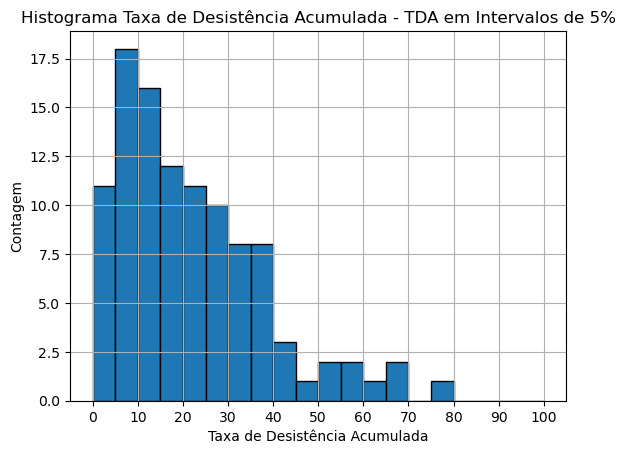

In [5]:
#Vamos verificar o histograma
# Defina os limites das bins em intervalos de 5%
bins = [i for i in range(0 , 101 , 5)]  # Isso cria uma lista de 0 a 100

# Crie o histograma usando o método hist do pandas
df['Taxa de Desistência Acumulada - TDA'].plot(kind='hist', bins=bins, edgecolor='k')

# Personalize o gráfico
plt.title('Histograma Taxa de Desistência Acumulada - TDA em Intervalos de 5%')
plt.xlabel('Taxa de Desistência Acumulada')
plt.ylabel('Contagem')
plt.xticks(range(0, 101, 10))  # Personalize os rótulos do eixo x
plt.grid(True)

# Exiba o gráfico
plt.show()

# Vamos calcular as correlações com a Taxa de Desistência Acumulada

C:\Users\Marcos\AppData\Local\Temp\ipykernel_2172\3806835473.py:15: UserWarning: Glyph 150 (\x96) missing from current font.
  plt.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


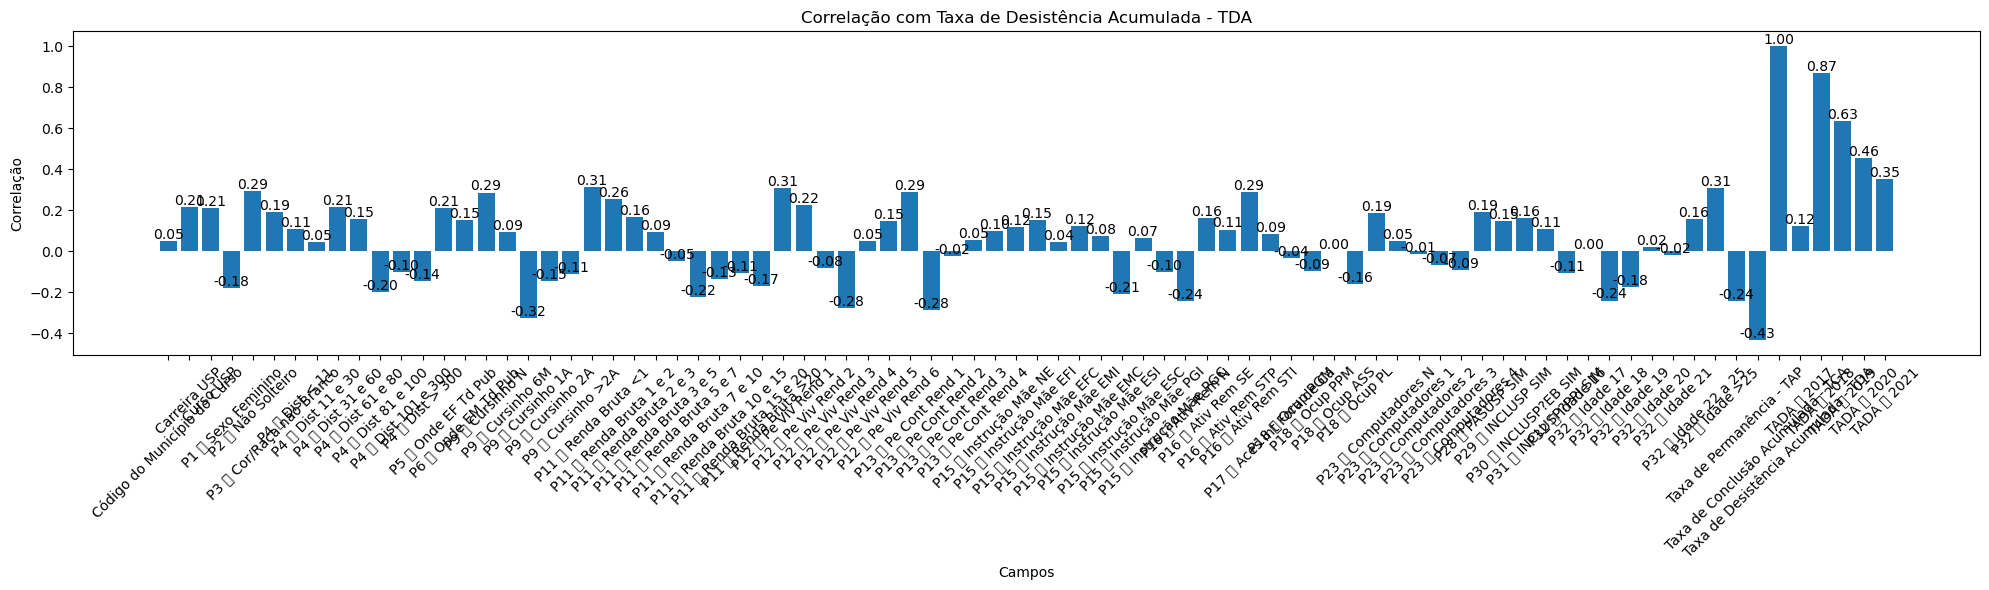

In [6]:
import matplotlib.pyplot as plt
# Escolha o campo que você deseja correlacionar com os outros campos
campo_escolhido = "Taxa de Desistência Acumulada - TDA"

# Calcule as correlações entre o campo escolhido e os outros campos
correlations_geral = df.corr()[campo_escolhido]

# Crie um gráfico de barras para mostrar as correlações
plt.figure(figsize=(20, 6))
bars = plt.bar(correlations_geral.index, correlations_geral.values)
plt.xlabel("Campos")
plt.ylabel("Correlação")
plt.title(f"Correlação com {campo_escolhido}")
plt.xticks(rotation=45)
plt.tight_layout()

for bar, correlation in zip(bars, correlations_geral.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{correlation:.2f}", ha="center")


plt.show()

In [15]:
# Configurar o Pandas para exibir todas as linhas
pd.set_option('display.max_rows', None)
print(correlations_geral.sort_values(ascending=False))

Taxa de Desistência Acumulada - TDA    1.000000
TADA  2018                            0.869972
TADA  2019                            0.633064
TADA  2020                            0.455022
TADA  2021                            0.351351
P11  Renda Bruta <1                   0.310904
P12  Pe Viv Rend 1                    0.308506
P32  Idade >25                        0.307843
P2  Não Solteiro                      0.292391
P13  Pe Cont Rend 1                   0.288375
P16  Ativ Rem STI                     0.286675
P9  Cursinho N                        0.286141
P11  Renda Bruta 1 e 2                0.255900
P12  Pe Viv Rend 2                    0.223672
P4  Dist 31 e 60                      0.214342
Carreira USP                           0.213519
P5  Onde EF Td Pub                    0.208936
Curso USP                              0.208909
P28  PASUSP SIM                       0.192858
P3  Cor/Raça não Branco               0.190189
P23  Computadores N                   0

# Vamos calcular as correlações com a Taxa de Desistência TADA  2020

C:\Users\Marcos\AppData\Local\Temp\ipykernel_2172\3925994338.py:15: UserWarning: Glyph 150 (\x96) missing from current font.
  plt.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


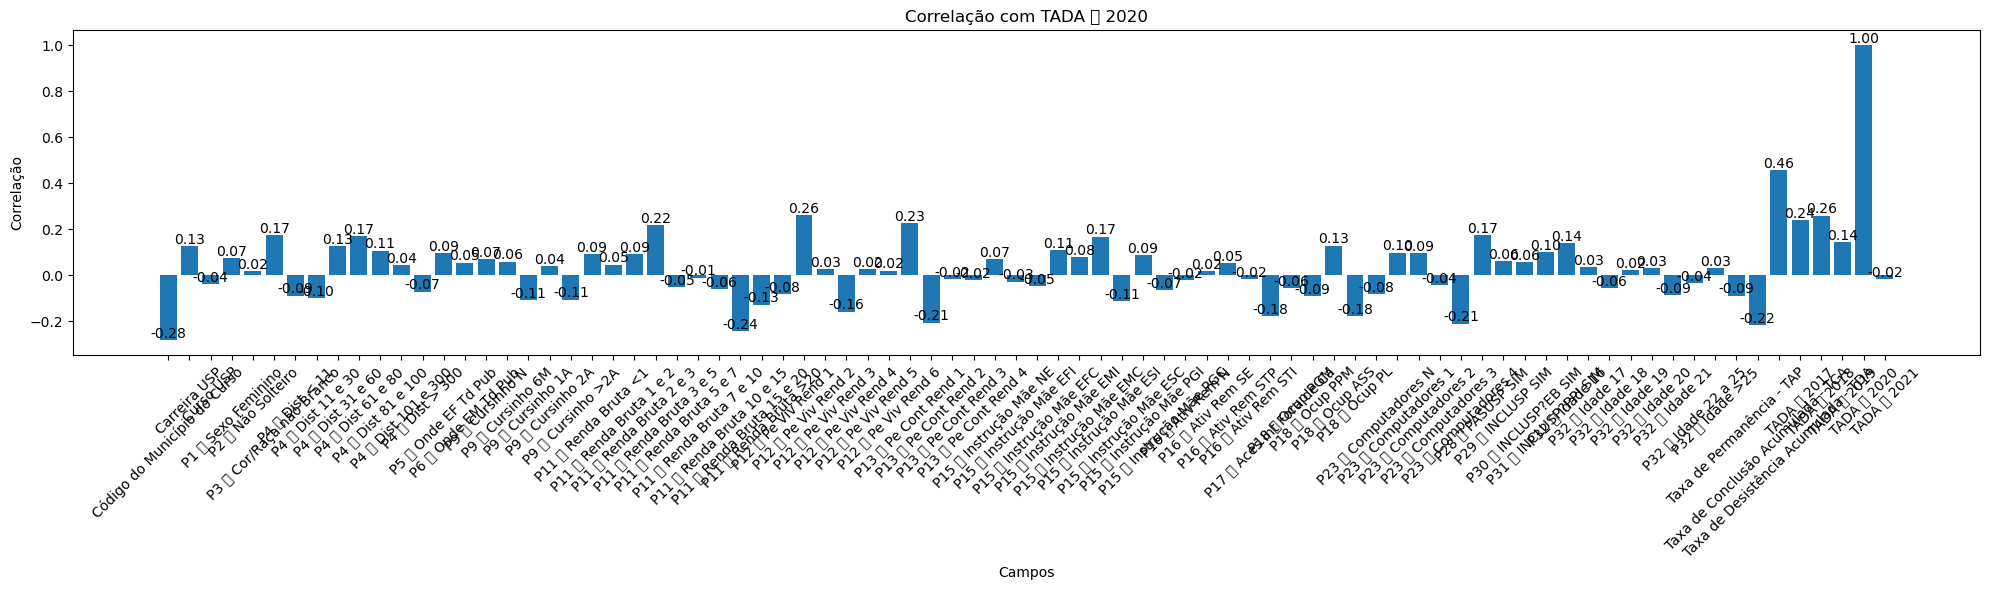

In [16]:
import matplotlib.pyplot as plt
# Escolha o campo que você deseja correlacionar com os outros campos
campo_escolhido = "TADA  2020"

# Calcule as correlações entre o campo escolhido e os outros campos
correlations_geral = df.corr()[campo_escolhido]

# Crie um gráfico de barras para mostrar as correlações
plt.figure(figsize=(20, 6))
bars = plt.bar(correlations_geral.index, correlations_geral.values)
plt.xlabel("Campos")
plt.ylabel("Correlação")
plt.title(f"Correlação com {campo_escolhido}")
plt.xticks(rotation=45)
plt.tight_layout()

for bar, correlation in zip(bars, correlations_geral.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{correlation:.2f}", ha="center")


plt.show()

In [18]:
correlations_geral.sort_values(ascending=False)

TADA  2020                            1.000000
Taxa de Desistência Acumulada - TDA    0.455022
P12  Pe Viv Rend 2                    0.260409
TADA  2018                            0.257904
TADA  2017                            0.238280
P13  Pe Cont Rend 1                   0.225579
P11  Renda Bruta 3 e 5                0.215678
P3  Cor/Raça não Branco               0.174805
P28  PASUSP SIM                       0.172108
P4  Dist 61 e 80                      0.168055
P15  Instrução Mãe ESI                0.166421
TADA  2019                            0.142848
P32  Idade 16                         0.139422
P18  Ocup ASS                         0.127580
P4  Dist 31 e 60                      0.126644
Carreira USP                           0.125402
P15  Instrução Mãe EMI                0.107673
P4  Dist 81 e 100                     0.106407
P31  INCLUSP?PPI SIM                  0.100542
P23  Computadores 1                   0.098110
P5  Onde EF Td Pub                    0

In [19]:
# Função para atribuir classe "Abaixo da Média" ou "Acima da Média" com base no TDA
def atribuir_classe(valor, limiar):
    if valor > limiar:
        return 'Acima da Média'
    else:
        return 'Abaixo da Média'


# Aplicar a função à coluna 'Taxa de Desistência Acumulada - TDA' e criar uma nova coluna 'Classe alvo'
media = df['Taxa de Desistência Acumulada - TDA'].mean()
limiar = media
df['Classe alvo'] = df['Taxa de Desistência Acumulada - TDA'].apply(atribuir_classe, args=(limiar,))
df

,Código do Curso de Graduação,Nome do Curso de Graduação,Código do Município do Curso,Município,Carreira USP,Curso USP,P1  Sexo Feminino,P2  Não Solteiro,P3  Cor/Raça não Branco,P4  Dist < 11,P4  Dist 11 e 30,P4  Dist 31 e 60,P4  Dist 61 e 80,P4  Dist 81 e 100,P4  Dist 101 e 300,P4  Dist > 300,P5  Onde EF Td Pub,P6  Onde EM Td Pub,P9  Cursinho N,P9  Cursinho 6M,P9  Cursinho 1A,P9  Cursinho 2A,P9  Cursinho >2A,P11  Renda Bruta <1,P11  Renda Bruta 1 e 2,P11  Renda Bruta 2 e 3,P11  Renda Bruta 3 e 5,P11  Renda Bruta 5 e 7,P11  Renda Bruta 7 e 10,P11  Renda Bruta 10 e 15,P11  Renda Bruta 15 e 20,P11  Renda Bruta >20,P12  Pe Viv Rend 1,P12  Pe Viv Rend 2,P12  Pe Viv Rend 3,P12  Pe Viv Rend 4,P12  Pe Viv Rend 5,P12  Pe Viv Rend 6,P13  Pe Cont Rend 1,P13  Pe Cont Rend 2,P13  Pe Cont Rend 3,P13  Pe Cont Rend 4,P15  Instrução Mãe NE,P15  Instrução Mãe EFI,P15  Instrução Mãe EFC,P15  Instrução Mãe EMI,P15  Instrução Mãe EMC,P15  Instrução Mãe ESI,P15  Instrução Mãe ESC,P15  Instrução Mãe PGI,P15  Instrução Mãe PGC,P16  Ativ Rem N,P16  Ativ Rem SE,P16  Ativ Rem STP,P16  Ativ Rem STI,P17  Aces Int Fora de Ca,P18  Ocup PGM,P18  Ocup PPM,P18  Ocup ASS,P18  Ocup PL,P23  Computadores N,P23  Computadores 1,P23  Computadores 2,P23  Computadores 3,P23  Computadores 4,P28  PASUSP SIM,P29  INCLUSP SIM,P30  INCLUSP?EB SIM,P31  INCLUSP?PPI SIM,P32  Idade 16,P32  Idade 17,P32  Idade 18,P32  Idade 19,P32  Idade 20,P32  Idade 21,P32  Idade 22 a 25,P32  Idade >25,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,TADA  2017,TADA  2018,TADA  2019,TADA  2020,TADA  2021,Classe alvo
0,1292746,ADMINISTRAÇÃO,3538709,Piracicaba,101,12,42.9,0.0,8.6,20.0,17.1,17.1,5.7,8.6,28.6,2.9,14.3,17.1,37.1,14.3,25.7,17.1,5.7,0.0,2.9,5.7,25.7,17.1,14.3,14.3,11.4,8.6,0.0,2.9,31.4,60.0,2.9,2.9,28.6,65.7,5.7,0.0,0.0,0.0,0.0,2.9,17.1,5.7,48.6,2.9,22.9,97.1,0.0,0.0,2.9,0.0,2.9,22.9,45.7,20.0,2.9,34.3,40.0,14.3,8.6,2.9,17.1,11.4,2.9,0.0,22.9,28.6,28.6,11.4,2.9,5.7,0.0,13.2,55.3,31.6,0.0,15.8,7.9,5.3,2.6,Acima da Média
1,2880,ARQUITETURA E URBANISMO,3550308,São Paulo,105,13,64.2,0.9,18.9,27.4,33.0,9.4,4.7,6.6,11.3,7.5,7.5,12.3,30.2,6.6,41.5,17.0,4.7,0.9,3.8,6.6,9.4,17.9,16.0,14.2,8.5,22.6,0.9,13.2,22.6,44.3,15.1,3.8,32.1,65.1,2.8,0.0,0.0,4.7,1.9,0.9,10.4,2.8,48.1,3.8,27.4,94.3,3.8,0.9,0.9,0.9,0.9,14.2,42.5,28.3,0.0,19.8,36.8,27.4,16.0,0.9,12.3,6.6,1.9,0.9,26.4,26.4,29.2,5.7,4.7,2.8,3.8,85.6,2.6,11.8,0.0,2.0,3.9,2.6,3.3,Abaixo da Média
2,2886,ARQUITETURA E URBANISMO,3548906,São Carlos,110,14,67.7,0.0,19.3,16.1,0.0,3.2,3.2,6.5,48.4,22.6,9.7,9.7,22.6,12.9,38.7,19.4,6.5,0.0,3.2,9.7,12.9,9.7,22.6,22.6,3.2,16.1,0.0,3.2,25.8,51.6,19.4,0.0,25.8,71.0,0.0,3.2,0.0,3.2,0.0,0.0,16.1,9.7,32.3,3.2,35.5,93.5,6.5,0.0,0.0,0.0,3.2,12.9,41.9,35.5,0.0,16.1,32.3,22.6,29.0,0.0,9.7,3.2,3.2,3.2,16.1,22.6,32.3,16.1,6.5,3.2,0.0,74.5,15.7,9.8,0.0,0.0,0.0,2.0,7.8,Abaixo da Média
3,2913/1404436,ARTES CÊNICAS,3550308,São Paulo,115,15,60.0,0.0,26.7,6.7,43.3,6.7,0.0,10.0,10.0,23.3,23.3,40.0,46.7,6.7,36.7,6.7,3.3,0.0,6.7,10.0,23.3,10.0,3.3,20.0,10.0,16.7,3.3,16.7,16.7,40.0,16.7,6.7,40.0,46.7,13.3,0.0,0.0,3.3,0.0,3.3,16.7,13.3,30.0,0.0,33.3,56.7,43.3,0.0,0.0,3.3,0.0,20.0,50.0,13.3,3.3,30.0,50.0,0.0,16.7,6.7,40.0,23.3,13.3,0.0,26.7,33.3,23.3,3.3,6.7,3.3,3.3,67.9,25.0,7.1,0.0,0.0,0.0,7.1,3.6,Abaixo da Média
4,33343/45510,ARTES VISUAIS,3550308,São Paulo,125,17,83.3,6.7,30.0,36.7,40.0,6.7,3.3,3.3,0.0,10.0,23.3,33.3,36.7,16.7,33.3,13.3,0.0,0.0,3.3,16.7,13.3,10.0,16.7,20.0,3.3,16.7,6.7,16.7,20.0,33.3,23.3,0.0,36.7,46.7,16.7,0.0,0.0,13.3,3.3,0.0,6.7,6.7,43.3,0.0,26.7,76.7,10.0,10.0,3.3,3.3,3.3,13.3,46.7,23.3,0.0,30.0,36.7,20.0,13.3,6.7,33.3,20.0,3.3,0.0,13.3,26.7,6.7,13.3,6.7,13.3,20.0,48.6,24.3,27.1,0.0,0.0,0.0,10.0,17.1,Acima da Média
5,60178,BIBLIOTECONOMIA E CIÊNCIA DA INFORMAÇÃO,3543402,Ribeirão Preto,140,21,53.8,7.7,15.4,30.8,53.8,0.0,7.7,0.0,7.7,0.0,69.2,76.9,38.5,7.7,38.5,0.0,15.4,0.0,7.7,38.5,2

In [20]:
df['Município'].unique()

array(['Piracicaba', 'São Paulo', 'São Carlos', 'Ribeirão Preto', 'Bauru',
       'Pirassununga', 'Lorena'], dtype=object)

In [21]:
df.columns

Index(['Código do Curso de Graduação', 'Nome do Curso de Graduação',
       'Código do Município do Curso', 'Município', 'Carreira USP',
       'Curso USP', 'P1  Sexo Feminino', 'P2  Não Solteiro',
       'P3  Cor/Raça não Branco', 'P4  Dist < 11', 'P4  Dist 11 e 30',
       'P4  Dist 31 e 60', 'P4  Dist 61 e 80', 'P4  Dist 81 e 100',
       'P4  Dist 101 e 300', 'P4  Dist > 300', 'P5  Onde EF Td Pub',
       'P6  Onde EM Td Pub', 'P9  Cursinho N', 'P9  Cursinho 6M',
       'P9  Cursinho 1A', 'P9  Cursinho 2A', 'P9  Cursinho >2A',
       'P11  Renda Bruta <1', 'P11  Renda Bruta 1 e 2',
       'P11  Renda Bruta 2 e 3', 'P11  Renda Bruta 3 e 5',
       'P11  Renda Bruta 5 e 7', 'P11  Renda Bruta 7 e 10',
       'P11  Renda Bruta 10 e 15', 'P11  Renda Bruta 15 e 20',
       'P11  Renda Bruta >20', 'P12  Pe Viv Rend 1', 'P12  Pe Viv Rend 2',
       'P12  Pe Viv Rend 3', 'P12  Pe Viv Rend 4', 'P12  Pe Viv Rend 5',
       'P12  Pe Viv Rend 6', 'P13  Pe Cont R

In [22]:
# Selecionar colunas de recursos e alvo
X = df[['Município', 'Carreira USP',
       'Curso USP', 'P1  Sexo Feminino', 'P2  Não Solteiro',
       'P3  Cor/Raça não Branco', 'P4  Dist < 11', 'P4  Dist 11 e 30',
       'P4  Dist 31 e 60', 'P4  Dist 61 e 80', 'P4  Dist 81 e 100',
       'P4  Dist 101 e 300', 'P4  Dist > 300', 'P5  Onde EF Td Pub',
       'P6  Onde EM Td Pub', 'P9  Cursinho N', 'P9  Cursinho 6M',
       'P9  Cursinho 1A', 'P9  Cursinho 2A', 'P9  Cursinho >2A',
       'P11  Renda Bruta <1', 'P11  Renda Bruta 1 e 2',
       'P11  Renda Bruta 2 e 3', 'P11  Renda Bruta 3 e 5',
       'P11  Renda Bruta 5 e 7', 'P11  Renda Bruta 7 e 10',
       'P11  Renda Bruta 10 e 15', 'P11  Renda Bruta 15 e 20',
       'P11  Renda Bruta >20', 'P12  Pe Viv Rend 1', 'P12  Pe Viv Rend 2',
       'P12  Pe Viv Rend 3', 'P12  Pe Viv Rend 4', 'P12  Pe Viv Rend 5',
       'P12  Pe Viv Rend 6', 'P13  Pe Cont Rend 1', 'P13  Pe Cont Rend 2',
       'P13  Pe Cont Rend 3', 'P13  Pe Cont Rend 4',
       'P15  Instrução Mãe NE', 'P15  Instrução Mãe EFI',
       'P15  Instrução Mãe EFC', 'P15  Instrução Mãe EMI',
       'P15  Instrução Mãe EMC', 'P15  Instrução Mãe ESI',
       'P15  Instrução Mãe ESC', 'P15  Instrução Mãe PGI',
       'P15  Instrução Mãe PGC', 'P16  Ativ Rem N', 'P16  Ativ Rem SE',
       'P16  Ativ Rem STP', 'P16  Ativ Rem STI', 'P17  Aces Int Fora de Ca',
       'P18  Ocup PGM', 'P18  Ocup PPM', 'P18  Ocup ASS', 'P18  Ocup PL',
       'P23  Computadores N', 'P23  Computadores 1', 'P23  Computadores 2',
       'P23  Computadores 3', 'P23  Computadores 4', 'P28  PASUSP SIM',
       'P29  INCLUSP SIM', 'P30  INCLUSP?EB SIM', 'P31  INCLUSP?PPI SIM',
       'P32  Idade 16', 'P32  Idade 17', 'P32  Idade 18', 'P32  Idade 19',
       'P32  Idade 20', 'P32  Idade 21', 'P32  Idade 22 a 25',
       'P32  Idade >25',
       ]]  # Variáveis preditoras
y = df['Classe alvo']  # Variável alvo

In [23]:
X['Município']

0          Piracicaba
1           São Paulo
2          São Carlos
3           São Paulo
4           São Paulo
5      Ribeirão Preto
6           São Paulo
7           São Paulo
8      Ribeirão Preto
9           São Paulo
10          São Paulo
11     Ribeirão Preto
12         Piracicaba
13     Ribeirão Preto
14          São Paulo
15         Piracicaba
16          São Paulo
17          São Paulo
18     Ribeirão Preto
19     Ribeirão Preto
20          São Paulo
21          São Paulo
22          São Paulo
23          São Paulo
24         Piracicaba
25     Ribeirão Preto
26          São Paulo
27     Ribeirão Preto
28         Piracicaba
29          São Paulo
30     Ribeirão Preto
31          São Paulo
32          São Paulo
33     Ribeirão Preto
34     Ribeirão Preto
35         Piracicaba
36         Piracicaba
37          São Paulo
38          São Paulo
39     Ribeirão Preto
40          São Paulo
41     Ribeirão Preto
42          São Paulo
43              Bauru
44     Ribeirão Preto
45        

In [24]:
# Codificar as colunas categóricas para números usando LabelEncoder
label_encoder = LabelEncoder()

for column in X.columns:
    if type(X[column][0]) == str:
        X[column] = label_encoder.fit_transform(X[column])


X['Município']

C:\Users\Marcos\AppData\Local\Temp\ipykernel_2172\267217191.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])


0      2
1      6
2      5
3      6
4      6
5      4
6      6
7      6
8      4
9      6
10     6
11     4
12     2
13     4
14     6
15     2
16     6
17     6
18     4
19     4
20     6
21     6
22     6
23     6
24     2
25     4
26     6
27     4
28     2
29     6
30     4
31     6
32     6
33     4
34     4
35     2
36     2
37     6
38     6
39     4
40     6
41     4
42     6
43     0
44     4
45     6
46     6
47     4
48     6
49     3
50     4
51     6
52     6
53     6
54     0
55     4
56     6
57     4
58     6
59     6
60     4
61     3
62     5
63     6
64     5
65     5
66     1
67     5
68     1
69     5
70     3
71     1
72     5
73     1
74     5
75     5
76     5
77     1
78     6
79     6
80     6
81     6
82     6
83     6
84     6
85     6
86     6
87     6
88     5
89     5
90     5
91     6
92     6
93     6
94     6
95     6
96     5
97     4
98     6
99     4
100    5
101    6
102    4
103    6
104    4
105    4
Name: Município, dtype: int32

# Como são poucos dados, vamos utilizar o método Leave One Out

In [25]:
# Inicializar uma lista para armazenar os resultados de acurácia
accuracies = []

# Inicializar o objeto Leave One Out
loo = LeaveOneOut()

# Inicializar uma lista para armazenar as importâncias das características em cada iteração
feature_importances_list = []

# Iterar sobre os índices gerados pelo Leave One Out
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Criar um modelo de Árvore de Decisão
    model = DecisionTreeClassifier(random_state=42)
    
    # Treinar o modelo com os dados de treinamento
    model.fit(X_train, y_train)
    
    # Obter importâncias das características e armazenar
    feature_importances = model.feature_importances_
    feature_importances_list.append(feature_importances)
    
    # Fazer previsões nos dados de teste
    y_pred = model.predict(X_test)
    
    # Avaliar a precisão do modelo para esta iteração e armazenar
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Calcular a média das importâncias das características em todas as iterações
mean_feature_importances = np.mean(feature_importances_list, axis=0)

# Criar um DataFrame para visualização das importâncias
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': mean_feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Exibir as características mais importantes
print(importance_df)    
    
# Calcular a média das precisões em todas as iterações
mean_accuracy = sum(accuracies) / len(accuracies)

# Exibir a média da acurácia
print(f'Média da Acurácia LOO: {mean_accuracy:.2f}')

                      Feature  Importance
4           P2  Não Solteiro    0.118209
45    P15  Instrução Mãe ESC    0.095772
64       P30  INCLUSP?EB SIM    0.088153
1                Carreira USP    0.080548
8           P4  Dist 31 e 60    0.059099
17           P9  Cursinho 1A    0.055795
67             P32  Idade 17    0.044550
25   P11  Renda Bruta 7 e 10    0.041890
52  P17  Aces Int Fora de Ca    0.041162
51         P16  Ativ Rem STI    0.037092
34        P12  Pe Viv Rend 6    0.031613
14        P6  Onde EM Td Pub    0.025896
15            P9  Cursinho N    0.025127
5    P3  Cor/Raça não Branco    0.023778
41    P15  Instrução Mãe EFC    0.020922
68             P32  Idade 18    0.020682
38       P13  Pe Cont Rend 4    0.016328
40    P15  Instrução Mãe EFI    0.015380
16           P9  Cursinho 6M    0.014458
13        P5  Onde EF Td Pub    0.013233
24    P11  Renda Bruta 5 e 7    0.013193
72        P32  Idade 22 a 25    0.011286
3          P1  Sexo Feminino    0

In [26]:
feature_importances_list[0]

array([0.        , 0.1185527 , 0.        , 0.        , 0.17265385,
       0.        , 0.        , 0.        , 0.09692308, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03934911,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.07293982, 0.        , 0.        ,
       0.        , 0.        , 0.03786058, 0.        , 0.        ,
       0.        , 0.08480769, 0.03028846, 0.        , 0.        ,
       0.14361991, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.07269231,
       0.        , 0.        , 0.06108173, 0.        , 0.        ,
       0.        , 0.06923077, 0.        , 0.        ])

In [27]:
accuracies

[0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0]

In [28]:
#E se utilzássemos o algoritmo Random Forest?
from sklearn.ensemble import RandomForestClassifier

# Inicializar uma lista para armazenar os resultados de acurácia
accuracies = []

# Inicializar o objeto Leave One Out
loo = LeaveOneOut()

# Inicializar uma lista para armazenar as importâncias das características em cada iteração
feature_importances_list = []

# Iterar sobre os índices gerados pelo Leave One Out
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Criar um modelo de Árvore de Decisão
    model = RandomForestClassifier(n_estimators=200, random_state=42)
    
    # Treinar o modelo com os dados de treinamento
    model.fit(X_train, y_train)
    
    # Obter importâncias das características e armazenar
    feature_importances = model.feature_importances_
    feature_importances_list.append(feature_importances)
    
    # Fazer previsões nos dados de teste
    y_pred = model.predict(X_test)
    
    # Avaliar a precisão do modelo para esta iteração e armazenar
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Calcular a média das importâncias das características em todas as iterações
mean_feature_importances = np.mean(feature_importances_list, axis=0)

# Criar um DataFrame para visualização das importâncias
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': mean_feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Exibir as características mais importantes
print(importance_df)    
    
# Calcular a média das precisões em todas as iterações
mean_accuracy = sum(accuracies) / len(accuracies)

# Exibir a média da acurácia
print(f'Média da Acurácia LOO: {mean_accuracy:.2f}')

                      Feature  Importance
25   P11  Renda Bruta 7 e 10    0.040764
51         P16  Ativ Rem STI    0.035542
36       P13  Pe Cont Rend 2    0.029672
35       P13  Pe Cont Rend 1    0.027686
4           P2  Não Solteiro    0.026996
17           P9  Cursinho 1A    0.026480
52  P17  Aces Int Fora de Ca    0.025665
12            P4  Dist > 300    0.023703
1                Carreira USP    0.022179
3          P1  Sexo Feminino    0.019268
30        P12  Pe Viv Rend 2    0.018659
73            P32  Idade >25    0.018586
45    P15  Instrução Mãe ESC    0.018417
24    P11  Renda Bruta 5 e 7    0.018132
9           P4  Dist 61 e 80    0.018064
2                   Curso USP    0.017377
40    P15  Instrução Mãe EFI    0.016875
13        P5  Onde EF Td Pub    0.016638
8           P4  Dist 31 e 60    0.016313
48           P16  Ativ Rem N    0.016239
69             P32  Idade 19    0.016175
68             P32  Idade 18    0.015590
33        P12  Pe Viv Rend 5    0

In [29]:
#E se utilzássemos o algoritmo Regressão Logística?
from sklearn.linear_model import LogisticRegression

# Inicializar uma lista para armazenar os resultados de acurácia
accuracies = []

# Inicializar o objeto Leave One Out
loo = LeaveOneOut()

# Inicializar uma lista para armazenar as importâncias das características em cada iteração
feature_importances_list = []

# Iterar sobre os índices gerados pelo Leave One Out
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Criar um modelo de Árvore de Decisão
    model = LogisticRegression(max_iter=10000, random_state=42)
    
    # Treinar o modelo com os dados de treinamento
    model.fit(X_train, y_train)
      
    # Fazer previsões nos dados de teste
    y_pred = model.predict(X_test)
    
    # Avaliar a precisão do modelo para esta iteração e armazenar
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)


# Calcular a média das precisões em todas as iterações
mean_accuracy = sum(accuracies) / len(accuracies)

# Exibir a média da acurácia
print(f'Média da Acurácia LOO: {mean_accuracy:.2f}')

Média da Acurácia LOO: 0.60


In [30]:
#E se usássemos uma Rede Neural?
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [31]:
#Preprocessamento
#A classe alvo precisa estar como 0 ou 1
mapeamento = {
    'Acima da Média': 1,
    'Abaixo da Média': 0,
}


# Aplicar a transformação usando a função map do pandas
y = y.map(mapeamento)

y

0      1
1      0
2      0
3      0
4      1
5      1
6      0
7      0
8      0
9      1
10     1
11     0
12     1
13     0
14     0
15     1
16     1
17     1
18     1
19     0
20     0
21     1
22     1
23     0
24     0
25     0
26     0
27     0
28     1
29     0
30     0
31     1
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     1
46     0
47     0
48     0
49     0
50     0
51     1
52     0
53     0
54     0
55     0
56     0
57     0
58     1
59     0
60     1
61     1
62     1
63     0
64     1
65     0
66     1
67     0
68     1
69     0
70     1
71     1
72     1
73     0
74     1
75     1
76     0
77     0
78     1
79     0
80     0
81     1
82     1
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     1
91     1
92     1
93     0
94     1
95     1
96     1
97     0
98     0
99     1
100    0
101    1
102    1
103    0
104    1
105    0
Name: Classe alvo, dtype: int64

In [32]:
# Padronizar as features (opcional, mas geralmente recomendado)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
# Dividir os dados em conjunto de treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [34]:
# Defina o número de neurônios em cada camada
hidden_layer_sizes = (50, 30, 10, 5)  # Duas camadas ocultas com 50 e 30 neurônios, respectivamente

model_rn = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation='logistic', max_iter=1000, random_state=13)
model_rn.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 30, 10, 5),
              max_iter=1000, random_state=13)

In [35]:
y_pred = model_rn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo nos dados de teste:", accuracy)

Acurácia do modelo nos dados de teste: 0.5909090909090909
